In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car price /car data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data analysis

In [8]:
df.Owner.value_counts()

,count
Owner,
0,290
1,10
3,1


In [10]:
df.shape

(301, 9)

In [11]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [20]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking distributaion of categoriacal data

In [23]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


encoding the catogoriacal data



In [24]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
# spliting target and feature variables
X = df.drop(['Selling_Price','Car_Name'],axis=1)
Y = df['Selling_Price']

In [32]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,Y_train)

LinearRegression()

In [35]:
model.score(X_train,Y_train)

0.8799451660493711

In [47]:
Predictions = model.predict(X_test)
print(Predictions)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [41]:
test_score = model.score(X_test,Y_test)
print("R-squared score in the test set:", test_score)

R-squared score in the test set: 0.8365766715027051


visulize the actual price and predicted Prices

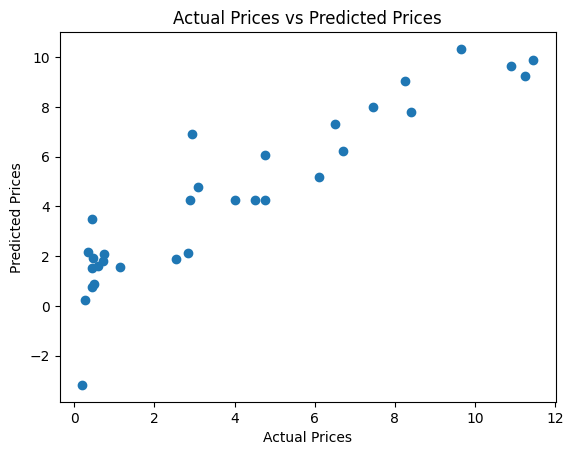

In [46]:
plt.scatter(Y_test, Predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [50]:

# Instantiate a Lasso model
lasso_model = Lasso()

# Fit the model to the training data
lasso_model.fit(X_train, Y_train)

# Evaluate the model on the training data
lasso_model.score(X_train, Y_train)


0.8427856123435794

In [52]:
# test accuracy on lasso
lasso_model.score(X_test, Y_test)

0.8709167941173195

In [55]:
# predicting values using lasso
lasso_model.predict(X_test)


array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])